In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import scipy.optimize as fit
import numpy as np
from astropy.table import Table
%matplotlib inline

In [151]:
raw_temp_df = pd.read_csv('GlobalLandTemperaturesByState.csv')
temp_df_with_states = raw_temp_df[['dt', 'AverageTemperature', 'State']]
temp_df_with_states = temp_df_with_states[(raw_temp_df['State'] == 'Wyoming') | (raw_temp_df['State'] == 'Wyoming') | (raw_temp_df['State'] == 'Nebraska') | (raw_temp_df['State'] == 'South Dakota')].sort_values(by = 'dt')
temp_df_with_states.drop(temp_df_with_states.index[:8252], inplace = True)
temp_df_with_states = temp_df_with_states.reset_index().drop(columns = ['index'])
temp_df_with_states

,dt,AverageTemperature,State
0,2000-01-01,-5.902,South Dakota
1,2000-01-01,-2.024,Nebraska
2,2000-01-01,-4.290,Wyoming
3,2000-02-01,-1.024,South Dakota
4,2000-02-01,-1.310,Wyoming
...,...,...,...
490,2013-08-01,22.501,South Dakota
491,2013-08-01,19.621,Wyoming
492,2013-09-01,20.001,South Dakota
493,2013-09-01,21.047,Nebraska


In [152]:
avg_temp_df = temp_df_with_states.drop(columns = ['State']).groupby('dt').agg('mean').reset_index()
avg_temp_df

,dt,AverageTemperature
0,2000-01-01,-4.072000
1,2000-02-01,-0.205000
2,2000-03-01,3.642667
3,2000-04-01,7.609667
4,2000-05-01,14.255000
...,...,...
160,2013-05-01,13.196000
161,2013-06-01,18.783667
162,2013-07-01,22.110333
163,2013-08-01,21.890000


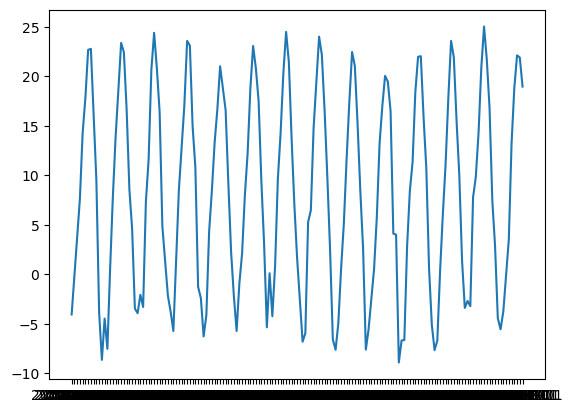

In [153]:
plt.plot(avg_temp_df['dt'], avg_temp_df['AverageTemperature'])

In [154]:
int_dates_df = avg_temp_df
int_dates_df['IntDates'] = int_dates_df['dt'].str.replace('-', '0').astype('int')
int_dates_df

,dt,AverageTemperature,IntDates
0,2000-01-01,-4.072000,2000001001
1,2000-02-01,-0.205000,2000002001
2,2000-03-01,3.642667,2000003001
3,2000-04-01,7.609667,2000004001
4,2000-05-01,14.255000,2000005001
...,...,...,...
160,2013-05-01,13.196000,2013005001
161,2013-06-01,18.783667,2013006001
162,2013-07-01,22.110333,2013007001
163,2013-08-01,21.890000,2013008001


In [155]:
def func(x, a, b, c, d):
    return -a * np.sin(b * x + c) + d

guess = [16, 0.1, np.pi, 8.0] 
parameters, cov_matrix = curve_fit(func, int_dates_df['IntDates'], int_dates_df['AverageTemperature'], p0 = guess)

print("Fitted parameters:", parameters)
print("Covariance matrix:", cov_matrix)



Fitted parameters: [16.          0.1         3.14159265  8.        ]
Covariance matrix: [[ 3.00457510e+05  1.40731028e-05 -1.12194243e+03 -1.79386208e+01]
 [ 1.40731028e-05  6.59174760e-16 -5.25510615e-08 -8.41802965e-10]
 [-1.12194243e+03 -5.25510615e-08  4.19586471e+00  6.85654351e-02]
 [-1.79386208e+01 -8.41802965e-10  6.85654351e-02  1.33829812e+00]]


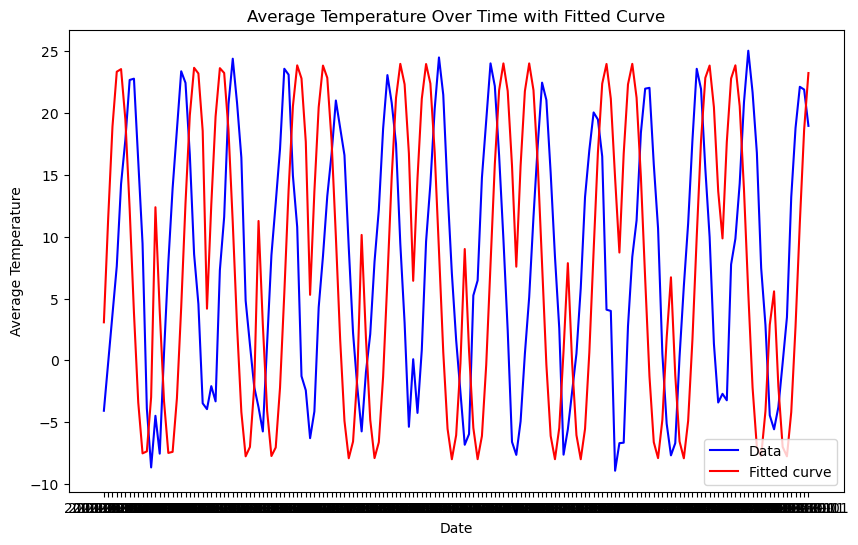

In [156]:
plt.figure(figsize=(10, 6))
plt.plot(int_dates_df['dt'], int_dates_df['AverageTemperature'], color='blue', label='Data')
plt.plot(int_dates_df['dt'], model_equation(int_dates_df['IntDates'], *parameters), color='red', label='Fitted curve')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Average Temperature Over Time with Fitted Curve')
plt.legend()
plt.show()

In [157]:
errors = np.sqrt(np.diag(cov_matrix))
print("\nFinal Results:")
for i, error in enumerate(errors):
    print(f"Parameter {i+1}: {params[i]} +/- {error}")
print("\nFinal Equation:")
print(f"Temperature = {params[0]} * sin({params[1]} * date + {params[2]}) + {params[3]}")


Final Results:
Parameter 1: -0.2605384957097474 +/- 548.1400461282706
Parameter 2: 0.499999998590067 +/- 2.567439891396183e-08
Parameter 3: 3.205942814200015 +/- 2.048380997909972
Parameter 4: 8.22938810438811 +/- 1.1568483576651079

Final Equation:
Temperature = -0.2605384957097474 * sin(0.499999998590067 * date + 3.205942814200015) + 8.22938810438811


In [162]:
data_table = Table.read('global_CCl4_MM.dat', format='ascii')
data_df = data_table.to_pandas()
data_df = data_df.drop(columns = ['CCl4ottomon', 'CCl4ottoNHm', 'CCl4ottoNHsd', 'CCl4ottoSHm', 'CCl4ottoSHsd'])
data_df.columns = ['date', 'global_mean_concentration', 'global_mean_concentration_sd']
data_df = data_df.dropna().reset_index().drop(columns = 'index')
data_df

,date,global_mean_concentration,global_mean_concentration_sd
0,1996,104.144,0.155
1,1996,103.893,0.174
2,1996,104.207,0.191
3,1996,104.136,0.147
4,1996,103.836,0.161
...,...,...,...
275,2019,79.008,0.199
276,2019,78.623,0.149
277,2019,78.862,0.226
278,2019,78.598,0.165


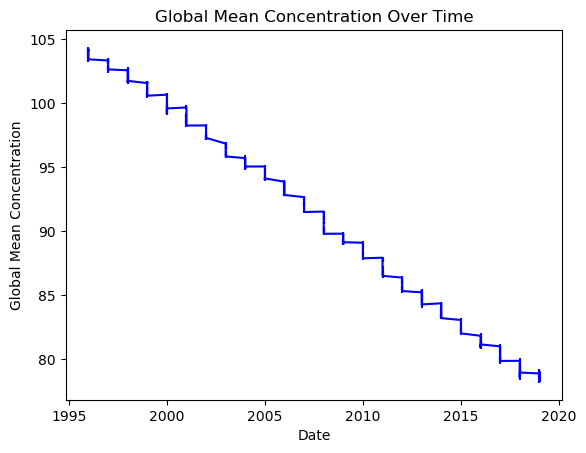

In [163]:
plt.errorbar(data_df['date'], data_df['global_mean_concentration'], yerr=data_df['global_mean_concentration_sd'], fmt='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Global Mean Concentration')
plt.title('Global Mean Concentration Over Time')
plt.show()

In [164]:
def linear_func(x, a, b):
    return a * x + b

parameters, cov_matrix = curve_fit(linear_func, data_df['date'], data_df['global_mean_concentration'])

print("Fitted parameters:", parameters)

Fitted parameters: [-1.14326355e+00  2.38630050e+03]


In [167]:
predicted = linear_func(data_df['date'], *parameters)
residuals = data_df['global_mean_concentration'] - predicted

n = len(data_df['date'])
m = len(parameters)
chi_squared = sum(residuals**2)
reduced_chi_squared = chi_squared / (n - m)

print("Reduced Chi-Squared value:", reduced_chi_squared)

Reduced Chi-Squared value: 0.1805772244351401


In [168]:
errors = np.sqrt(np.diag(cov_matrix))

print("Parameter 1: {:.3f} +/- {:.3f}".format(parameters[0], errors[0]))
print("Parameter 2: {:.3f} +/- {:.3f}".format(parameters[1], errors[1]))

print("Final Equation: y = {:.3f} * x + {:.3f}".format(parameters[0], parameters[1]))

Parameter 1: -1.143 +/- 0.004
Parameter 2: 2386.301 +/- 7.558
Final Equation: y = -1.143 * x + 2386.301
